# Reading RPS shotfiles

In [1]:
import dd
import matplotlib.pyplot as plt
import numpy as np
from closest import closest
import kk_abock

## Select a Shot number, experiment and a time instant

In [2]:
shotnr = 30554
experiment = 'AUGD' ##Or username of the private shotfile
tperf = 2.0

## Opening the RPS shotfile

In [3]:
rps = dd.shotfile('RPS', shotnr, experiment=experiment)

## Read the LFS profiles

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


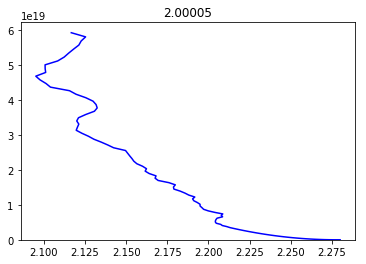

In [4]:
nel = rps('neb_LFS')
tind = closest(nel.time, tperf)
plt.plot(nel.area.data[tind,:], nel.data[tind,:], color='blue')
plt.title(nel.time[tind])
plt.ylim(bottom=0)
plt.show()

## Read the HFS profiles

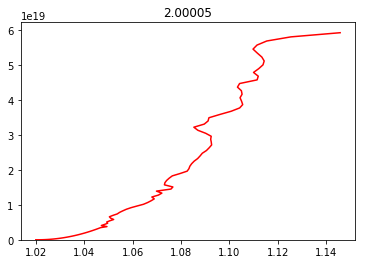

In [5]:
neh = rps('neb_HFS')
tind = closest(neh.time, tperf)
plt.plot(neh.area.data[tind,:], neh.data[tind,:], color='red')
plt.title(neh.time[tind])
plt.ylim(bottom=0)
plt.show()

## Map in $\rho_{pol}$

### Choose equilibrium

In [6]:
equil = 'EQH'

### Open equilibrium

In [7]:
eq = kk_abock.kk()
eq.Open(shotnr, diag=equil)

True

### Get the antenna Z positions

In [8]:
zl = rps.getParameter('AuxInfo', 'z_lfs')
zh = rps.getParameter('AuxInfo', 'z_hfs')

### Convert to $\rho_{pol}$

In [9]:
rhol = eq.Rz_to_rhopol(nel.time[tind], nel.area.data[tind,:], np.ones_like(nel.area.data[tind,:])*zl.data)
rhoh = eq.Rz_to_rhopol(neh.time[tind], neh.area.data[tind,:], np.ones_like(neh.area.data[tind,:])*zh.data)

### Plot again in $\rho_{pol}$

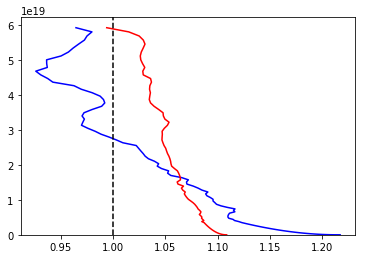

In [14]:
plt.plot(rhol, nel.data[tind,:], color='blue')
plt.plot(rhoh, neh.data[tind,:], color='red')
plt.axvline(x=1.0, ls='--', color='black')
plt.ylim(bottom=0)
plt.show()

## Close the RPS shotfile and the equilibrium

In [15]:
rps.close()
eq.Close()